# Lista de Exercícios III

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 26/02/2021

In [19]:
import matplotlib.pyplot as plt
import dc_stat_think as dcst
from scipy import signal
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

Vamos escrever im programa que usa o método FTCS para resolver o conjunto completo de equações simulatâneas de primeira ordem:

$$\frac{d\phi}{dt}=\psi(x,t)\text{ };$$

$$\frac{d\psi}{dt}=\frac{v^{2}}{a^{2}}\Bigg[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\Bigg]$$

onde $v=100$ $m/s$, com a condição inicial de $\phi(x)=0$ em todos os lugares, mas a velocidade $\psi(x)$ é diferente de zero, com perfil

$$\psi(x)=C\frac{x(L-x)}{L^{2}}\text{exp}\Bigg[-\frac{(x-d)^{2}}{2\sigma^{2}}\Bigg],$$

onde $L=1$ $m$, $d=10$ $cm$, $C=1$ $m/s$ e $\sigma=0.3$ $m$. Escolhemos um valor para o intervalo de tempo $h=10^{-6}$ $s$. Além disso, vamos fazer três figuras de instantâneo em $2$ $ms$, $50$ $ms$ e $100$ $ms$.

Inicialmente vamos definir as constantes que serão utilizadas ao longo do problema:

In [7]:
L = 1.0      # Comprimento da corda
C = 1.0      # m/s
d = 0.1      # Distância do martelo a partir de 0
N = 100      # Número de divisões na grade
sigma = 0.3  # Valor de sigma [m]
a = L/N      # Espaçamento da grade
v = 100.0    # Velocidade inicial
h = 1e-6     # Passo de tempo
epsilon = h/100

Definimos a função principal:

In [12]:
def initialpsi(x):
    return (C*x*(L-x)/(L**2))*np.exp((-(x-d)**2)/(2*sigma**2))

Definimos os valores iniciais e finais para $\phi$ e $\psi$:

In [9]:
phibeg = 0.0    # Ponto fixo inicial
phimiddle = 0.0 # Valor inicial de x
phiend = 0.0    # Ponto fixo final

psibeg = 0.0    # Valor de v no início
psiend = 0.0    # Valor de v no final

Definimos as strings para cada situação:

In [10]:
t2 = 2e-3      # String em 2ms
t50 = 50e-3    # String em 50ms
t100 = 100e-3  # String em 100ms
tend = t100 + epsilon

Agora criamos os arrays para $\phi$ e $\psi$:

In [25]:
# Arrays para phi:
phi = np.empty(N+1, float)
phi[0] = phibeg
phi[N] = phiend
phi[1:N] = phimiddle

phip = np.empty(N+1, float)
phip[0] = phibeg
phip[N] = phiend

# Arrays para psi:
psi = np.empty(N+1, float)
psi[0] = psibeg
psi[N] = psiend

for i in range(1,N):
    psi[i] = initialpsi(i*a)
psip = np.empty(N+1, float)
psip[0] = psibeg
psip[N] = psiend

Por fim, estabelecemos o nosso loop principal onde resolvemos as equações simultâneas fornecidas no enunciado do problema:

In [26]:
t = 0.0
D = h*v**2 / (a*a)

while t < tend:
    # Calcula os novos valores de T
    '''
    for i in range(1,N):
        phip[i] = phi[i] + h*psi[i]
        psip[i] = psi[i] + D*(phi[i+1]+phi[i-1]-2*phi[i])
    '''
    phip[1:N] = phi[1:N] + h*psi[1:N]
    psip[1:N] = psi[1:N] + D*(phi[0:N-1] + phi[2:N+1] - 2*phi[1:N])
    phi = np.copy(phip)
    psi = np.copy(psip)
    # phi, phip = phip, phi
    # psi, psip = psip, psi
    t += h
    
    # Cria plots para cada valor temporal
    if abs(t-t2) < epsilon:
        t2array = np.copy(phi)
        # plt.plot(phi, label = '2ms')
    if abs(t-t50) < epsilon:
        t50array = np.copy(phi)
        # plt.plot(phi, label = '50 ms')
    if abs(t-t100) < epsilon:
        t100array = np.copy(phi)
        # plt.plot(phi, label = '100 ms')

$\square$

### Letra b)

Como de costume, definimos a nossa função para auxiliar na estética dos plots:

In [22]:
def opt_plot():
    plt.grid(True, linestyle=":", color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=5, width=1, labelsize=15)
    plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8, width=1, labelsize=15)

Por fim, vamos plotar a vibração da corda para $2$ $ms$, $50$ $ms$ e $100$ $ms$:

<IPython.core.display.Javascript object>


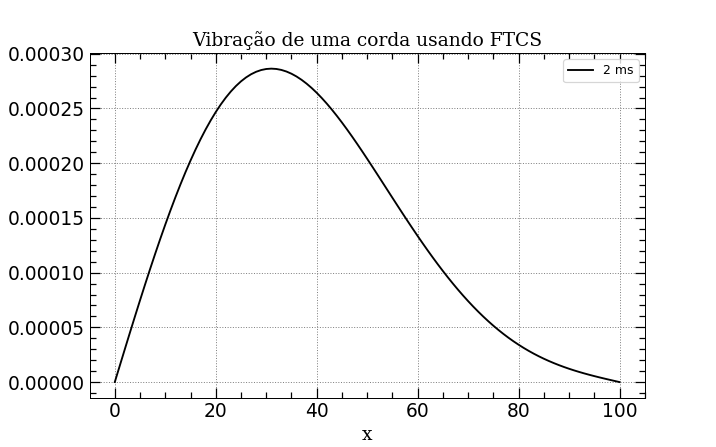

In [30]:
plt.figure(figsize=(8,5))

plt.plot(t2array, color='black', label='2 ms')
plt.title('Vibração de uma corda usando FTCS', family='serif', fontsize=15)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel(r'$\phi$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

<IPython.core.display.Javascript object>


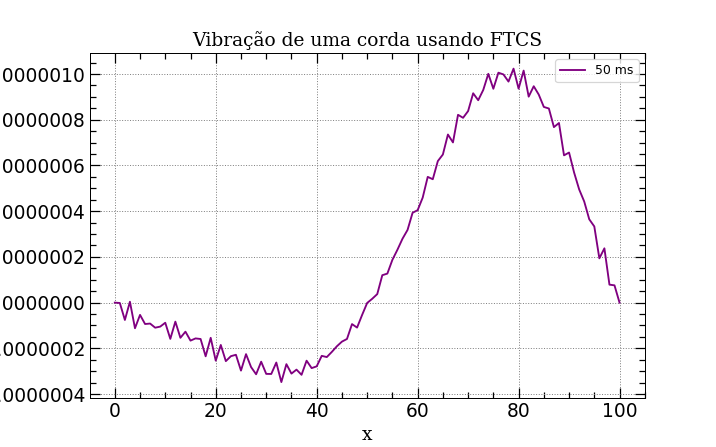

In [29]:
plt.figure(figsize=(8,5))

plt.plot(t50array, color='purple', label='50 ms')
plt.title('Vibração de uma corda usando FTCS', family='serif', fontsize=15)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel(r'$\phi$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

<IPython.core.display.Javascript object>


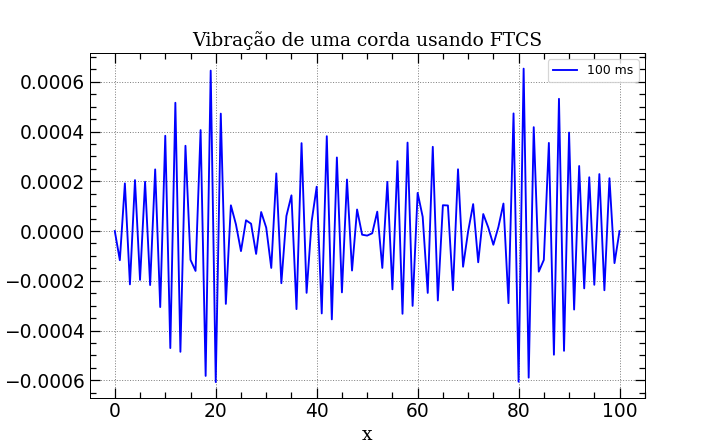

In [31]:
plt.figure(figsize=(8,5))

plt.plot(t100array, color='blue', label='100 ms')
plt.title('Vibração de uma corda usando FTCS', family='serif', fontsize=15)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel(r'$\phi$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Por fim, vamos plotar os três gráficos juntos para podermos comparar os resultados:

<IPython.core.display.Javascript object>


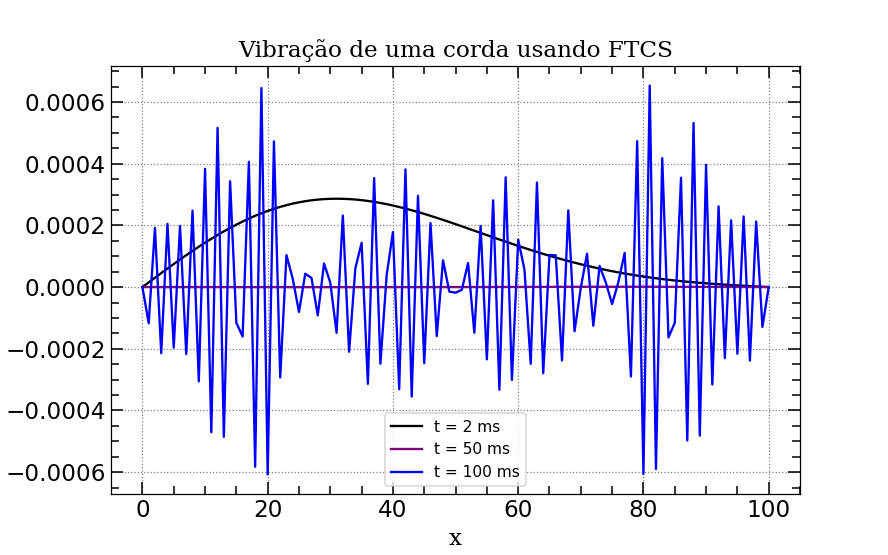

In [54]:
plt.figure(figsize=(8,5))

plt.plot(t2array, color='black', label='t = 2 ms')
plt.plot(t50array, color='purple', label='t = 50 ms')
plt.plot(t100array, color='blue', label='t = 100 ms')
plt.title('Vibração de uma corda usando FTCS', family='serif', fontsize=15)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel(r'$\phi$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

$\square$

$\text{ }$

## Problema 2